Will caluclate ratio by adding up sum of professors and dividing by sum of num of students enrolled in all those classes
do this for each semester
Have to do it this way since the WC factbook only has faculty info going back to 2017

issues: will be overcounting because students take multiple classes - though professors teach multiple sections
this is more adequate representation of class size by type of department

In [170]:
import os
import pandas as pd
import seaborn as sns

In [171]:
directory = 'C:/Users/abguh/Desktop/wdc/WellesleyCourses'
path = 'C:/Users/abguh/Desktop/wdc'
os.chdir(path)

In [172]:
dlist = []  #list of all dataframes
for filename in os.listdir(directory):
    dlist.append(pd.read_excel(os.path.join(directory, filename)))

In [173]:
humanities = ['AFR', 'AMST', 'ART', 'CLCV', 'EALC', 'ENG', 'FREN', 'GER', 'HIST', 'ITAS', 'MUS', 'PHIL', 'REL', 'SPAN', 'ARAB', 'CHIN', 'HNUR', 'JPN', 'KOR', 'LAT', 'LAST', 'PORT', 'SWA', 'WRIT', 'MES', 'RUSS', 'THST', 'CAMS', 'CPLT', 'GRK', 'HEBR', 'JWST', 'ARTS', 'ARTH', 'ARAB']
s_sciences =  ['COG', 'ECON', 'SOC', 'ANTH', 'WGST', 'PEAC', 'POL', 'POL1', 'POL2', 'POL3', 'POL4','PSYC', 'CLSC', 'EDUC', 'LING']
n_sciences = ['ASTR', 'BISC', 'CHEM', 'CS', 'ES', 'GEOS', 'MATH', 'NEUR', 'PHYS', 'QR', 'STAT', 'MAS', 'EXTD', 'BIOC']
other = ['PE']

In [174]:
dlist[0]

,CRN,Course,Title,CurrentEnrollment,SeatsAvailable,Location(s),Meeting Time(s),Day(s),Instructor,Additional Instructor(s),Distribution(s),More
0,11742,AFR 105 - 01,Intro to Black Experience,12,87 / 99,Green Hall ACAD,11:10 am - 12:20 pm,TF,Anthony Martin,NaN,NaN,More
1,12411,AFR 200 - 01,Africans in Antiquity,6,93 / 99,Founders Hall 317,01:30 pm - 02:40 pm,TF,Anthony Martin,NaN,NaN,More
2,12410,AFR 201 - 01,African-Amer Lit Tradition,7,92 / 99,Clapp Library 1,01:30 pm - 02:40 pm,MTh,Selwyn Cudjoe,NaN,NaN,More
3,12093,AFR 203 - 01,Intro Afro-American Sociology,6,24 / 30,Founders Hall 128,08:30 am - 09:40 am,MTh,Judith Rollins,NaN,NaN,More
4,11741,AFR 207 - 01,Images Africana People-Cinema,48,0 / 45,Founders Hall 120,07:30 pm - 10:00 pm,W,Pashington Obeng,NaN,NaN,More
...,...,...,...,...,...,...,...,...,...,...,...,...
607,12225,WRIT 125 - 19,What is Plural of Y'all?,16,0 / 15,Founders Hall 227,08:30 am - 09:40 am,TF,Richard Moll,NaN,NaN,More
608,12227,WRIT 125 - 21,Contemporary Writers of NE,10,5 / 15,Slater International Center,09:50 am - 11:00 am,MTh,Jennifer Barber,NaN,NaN,More
609,12273,WRIT 125 - 22,Writing about the Environment,13,2 / 15,Founders Hall 227 Founders Hall 227,01:30 pm - 02:40 pm 02:15 pm - 03:25 pm,F W,Barbara Goldoftas,NaN,NaN,More
610,12274,WRIT 125 - 23,PubHlth-Epidemics&Othr Battles,14,1 / 15,Founders Hall 227 Founders Hall 227,02:50 pm - 04:00 pm 03:35 pm - 04:45 pm,F W,Barbara Goldoftas,NaN,NaN,More


In [175]:

def course_label(x):
    label = x[:4].strip()
    if label in humanities: return 'hum'
    if label in s_sciences: return 'ss'
    if label in n_sciences: return 'ns'
    

def calculate_ratio(dataframe):

    df['label'] = df['Course'].apply(course_label)
    hums = df[df.label == 'hum']
    sss = df[df.label == 'ss']
    nss = df[df.label == 'ns']
    
    h_prof = len(hums.Instructor)
    s_prof = len(sss.Instructor)
    n_prof = len(nss.Instructor)
    
    h_stu = sum(hums.CurrentEnrollment)
    s_stu = sum(sss.CurrentEnrollment)
    n_stu = sum(nss.CurrentEnrollment)
    
    h_ratio = str(round(h_stu / h_prof)) + ":1"
    s_ratio = str(round(s_stu/s_prof)) + ":1"
    n_ratio = str(round(n_stu/n_prof)) + ":1"

    return (h_ratio, s_ratio, n_ratio)

In [176]:
ratios = []
for i in range(len(dlist)):    #for one semester
    name = os.listdir(directory)[i][:-5]
    df = dlist[i]
    h_ratio, s_ratio, n_ratio = calculate_ratio(df)
    ratios.append((name, h_ratio, s_ratio, n_ratio))

In [177]:
df_final = pd.DataFrame(ratios, columns = ['semester', 'humanities', 'social sciences', 'natural sciences'])
df_final

,semester,humanities,social sciences,natural sciences
0,2000-09,17:1,20:1,15:1
1,2001-02,17:1,19:1,14:1
2,2001-09,16:1,21:1,14:1
3,2002-02,16:1,19:1,14:1
4,2002-09,16:1,21:1,16:1
5,2003-02,15:1,19:1,14:1
6,2003-09,16:1,20:1,15:1
7,2004-02,15:1,18:1,13:1
8,2004-09,15:1,19:1,15:1
9,2005-02,15:1,18:1,14:1


now remove lab courses

In [178]:
def course_label(x):
    label = x[:4].strip()
    if 'L0' not in x:
        if label in humanities: return 'hum'
        if label in s_sciences: return 'ss'
        if label in n_sciences: return 'ns'
    

def calculate_ratio(dataframe):

    df['label'] = df['Course'].apply(course_label)
    hums = df[df.label == 'hum']
    sss = df[df.label == 'ss']
    nss = df[df.label == 'ns']
    
    h_prof = len(hums.Instructor)
    s_prof = len(sss.Instructor)
    n_prof = len(nss.Instructor)
    
    h_stu = sum(hums.CurrentEnrollment)
    s_stu = sum(sss.CurrentEnrollment)
    n_stu = sum(nss.CurrentEnrollment)
    
    h_ratio = round(h_stu / h_prof) 
    s_ratio = round(s_stu/s_prof) 
    n_ratio = round(n_stu/n_prof)

    return (h_ratio, s_ratio, n_ratio)

ratios = []
for i in range(len(dlist)):    #for one semester
    name = os.listdir(directory)[i][:-5]
    df = dlist[i]
    h_ratio, s_ratio, n_ratio = calculate_ratio(df)
    ratios.append((name, h_ratio, s_ratio, n_ratio))
    
df = pd.DataFrame(ratios, columns = ['semester', 'humanities', 'social sciences', 'natural sciences'])
df

,semester,humanities,social sciences,natural sciences
0,2000-09,17,20,19
1,2001-02,17,19,17
2,2001-09,16,21,18
3,2002-02,16,19,17
4,2002-09,16,21,20
5,2003-02,15,19,17
6,2003-09,16,20,19
7,2004-02,15,18,16
8,2004-09,15,21,20
9,2005-02,15,18,17


In [179]:
df = df.replace({':1': '', '-': '.'}, regex = True)
df

,semester,humanities,social sciences,natural sciences
0,2000.09,17,20,19
1,2001.02,17,19,17
2,2001.09,16,21,18
3,2002.02,16,19,17
4,2002.09,16,21,20
5,2003.02,15,19,17
6,2003.09,16,20,19
7,2004.02,15,18,16
8,2004.09,15,21,20
9,2005.02,15,18,17


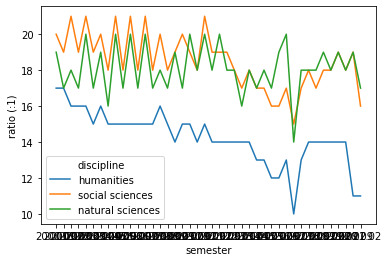

In [169]:
df = pd.melt(df, id_vars = 'semester', value_vars = ['humanities', 'social sciences', 'natural sciences'], var_name = 'discipline', value_name = 'ratio (:1)')
df
sns.lineplot(x="semester", y="ratio (:1)", hue="discipline", data=df)